# Project:- E-commerce Product Delivery Prediction

## Project Overview:
This project aims to enhance the understanding of product delivery patterns and customer behavior for an international e-commerce company specializing in electronic products. By leveraging machine learning, the project seeks to predict whether products will reach customers on time. The goal is to develop robust machine learning models to accurately predict product delivery timeliness, enabling the company to improve customer satisfaction, optimize logistics, and gain insights into factors affecting delivery performance.

## Step 1: Importing Libraries

In [1]:
import pandas as pd # Data manipulation
import numpy as np # Numerical operations
import seaborn as sns # Data visualization
import matplotlib.pyplot as plt # Data visualization

from sklearn.model_selection import train_test_split # Train-test split
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Data preprocessing
from sklearn.compose import ColumnTransformer # Column transformations
from sklearn.pipeline import Pipeline # Pipeline for model training

from sklearn.ensemble import RandomForestClassifier  # Random Forest model
from sklearn.tree import DecisionTreeClassifier    # Decision Tree model
from sklearn.linear_model import LogisticRegression   # Logistic Regression model
from sklearn.neighbors import KNeighborsClassifier    # K-Nearest Neighbors model

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay # Model evaluation metrics


## Step 2: Load the dataset 

In [2]:

df = pd.read_csv(r"C:\Users\dj005\Downloads\E_Commerce.csv")  # Load the dataset



## Step 3: Data Preprocessing & EDA

In [3]:
df.head()  # Display the first few rows

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
# Check the structure and missing values in the dataset
print(df.info())          # Column data types and non-null values



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB
None


In [5]:
print(df.isnull().sum())  # Check for missing values

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


In [6]:
df = df.dropna() # Drop rows with missing values

In [7]:
df.describe() # Display basic statistics of the dataset

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [8]:
df.columns.values # Display the column names

array(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered',
       'Weight_in_gms', 'Reached.on.Time_Y.N'], dtype=object)

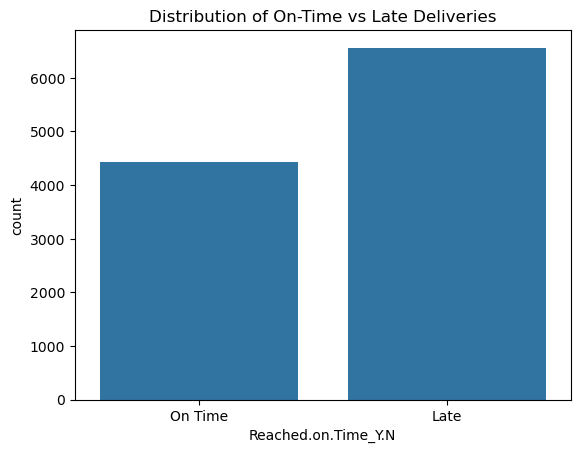

In [9]:
# Plot the distribution of the target variable
sns.countplot(x='Reached.on.Time_Y.N', data=df) # Distribution of on-time vs late deliveries
plt.title("Distribution of On-Time vs Late Deliveries") 
plt.xticks([0, 1], ['On Time', 'Late'])  # Custom labels
plt.show()  # Show the plot


C:\Users\dj005\AppData\Local\Temp\ipykernel_25504\2841527895.py:22: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()   # Adjust layout to prevent overlap
c:\Users\dj005\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


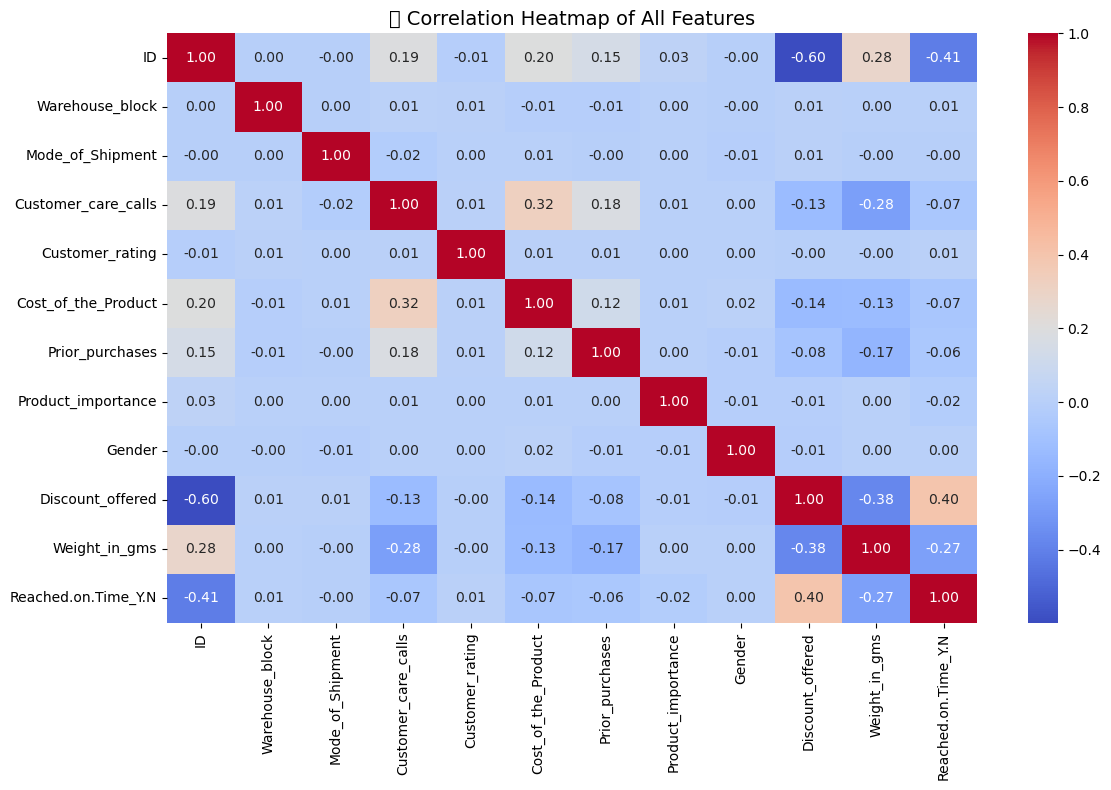

In [10]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of the original DataFrame
df_encoded = df.copy()

# Label encode only categorical columns
label_encoders = {}  # Dictionary to store label encoders
categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']   # List of categorical columns to encode

for col in categorical_cols:    # Loop through each categorical column
    le = LabelEncoder()          # Create a LabelEncoder instance
    df_encoded[col] = le.fit_transform(df_encoded[col])   # Fit and transform the column
    label_encoders[col] = le  # Save encoder if needed

# Now you can compute the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))    # Set the figure size for better readability
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f") # Plot the correlation matrix
plt.title("🔍 Correlation Heatmap of All Features", fontsize=14)
plt.tight_layout()   # Adjust layout to prevent overlap
plt.show()


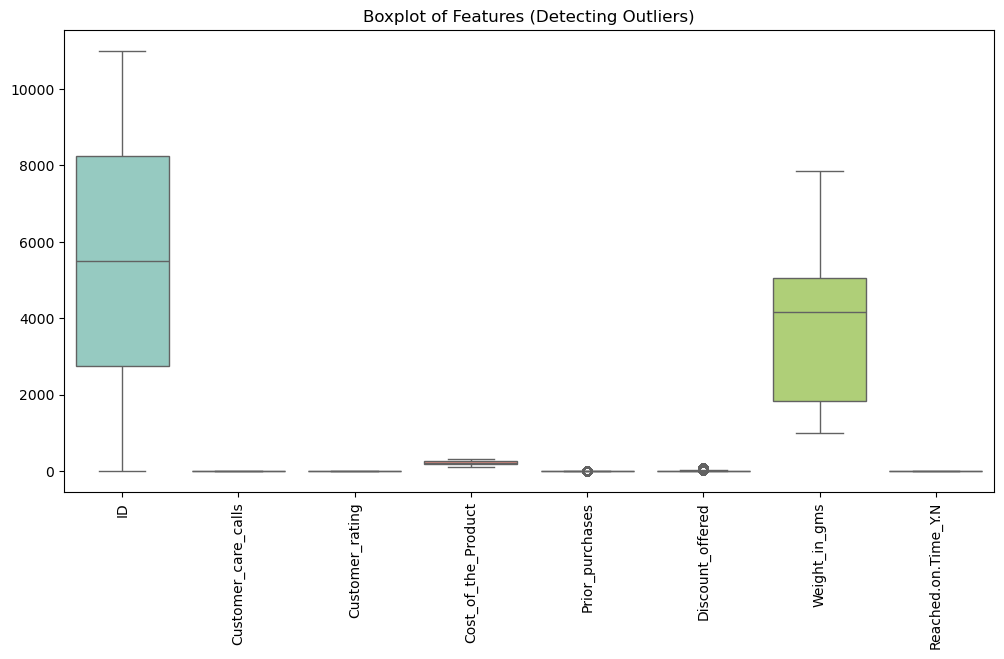

In [11]:
# Plot the distribution of each feature
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, palette="Set3")  # Boxplot to visualize the distribution of features
plt.title("Boxplot of Features (Detecting Outliers)")
plt.xticks(rotation=90)    # Rotate x-axis labels for better readability
plt.show()

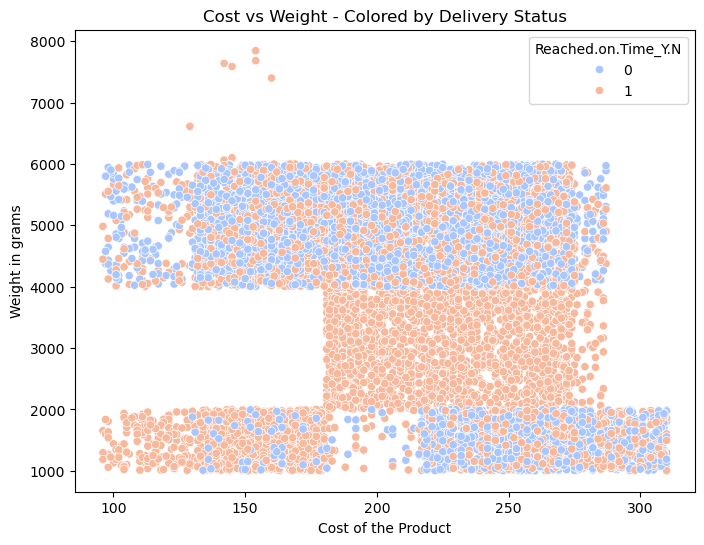

In [12]:
# Plot the relationship between 'Cost_of_the_Product' and 'Weight_in_gms'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Cost_of_the_Product', y='Weight_in_gms', hue='Reached.on.Time_Y.N', palette='coolwarm') # Scatter plot colored by delivery status
plt.title("Cost vs Weight - Colored by Delivery Status")  # Title of the plot
plt.xlabel("Cost of the Product") # X-axis label
plt.ylabel("Weight in grams")   # Y-axis label
plt.show()


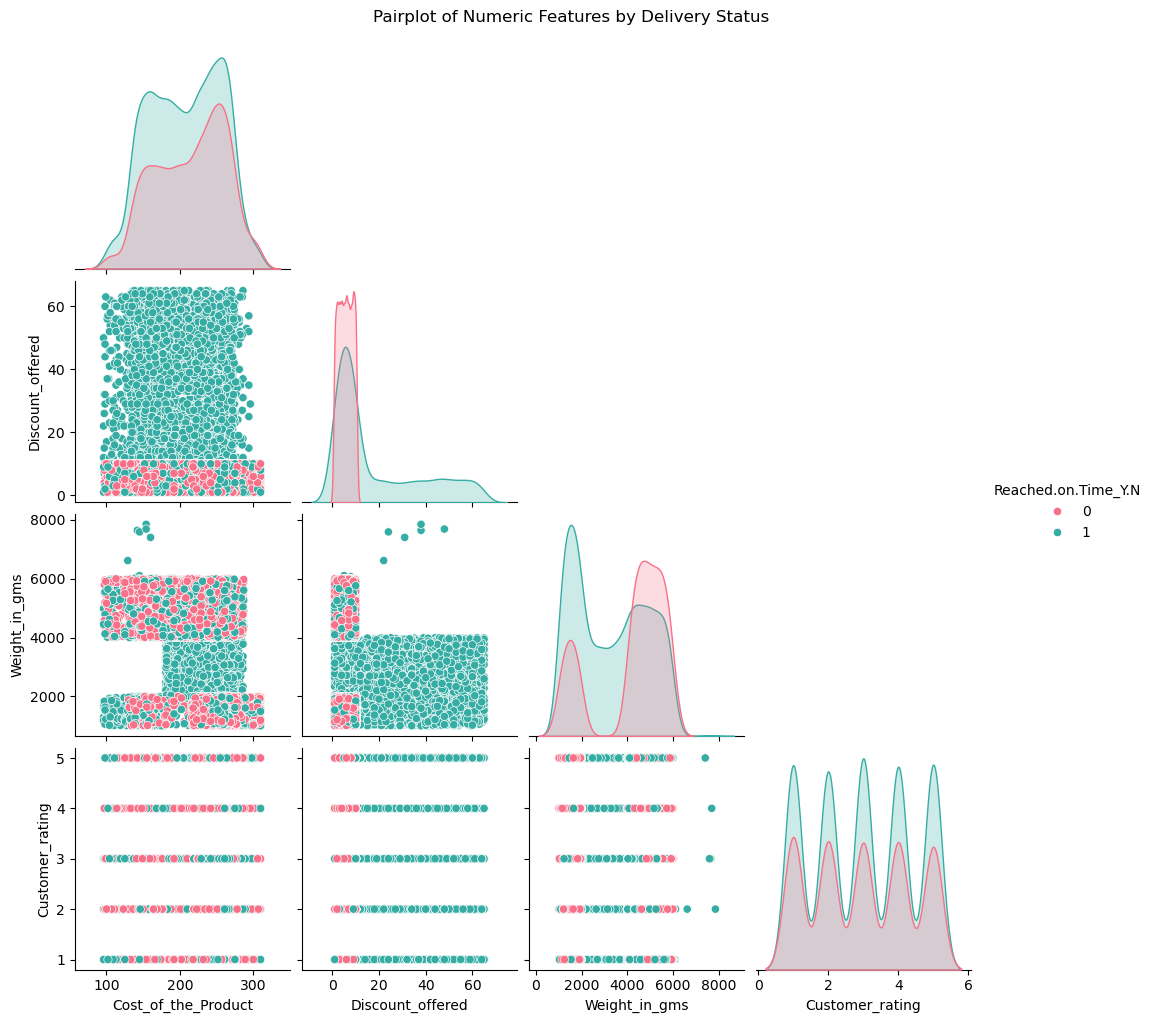

In [13]:
# Plot pairwise relationships between numeric features colored by delivery status
sns.pairplot(df, vars=['Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms', 'Customer_rating'],
             hue='Reached.on.Time_Y.N', palette='husl', diag_kind='kde', corner=True) # Pairplot to visualize relationships
plt.suptitle("Pairplot of Numeric Features by Delivery Status", y=1.02) # Adjust title position
plt.show()


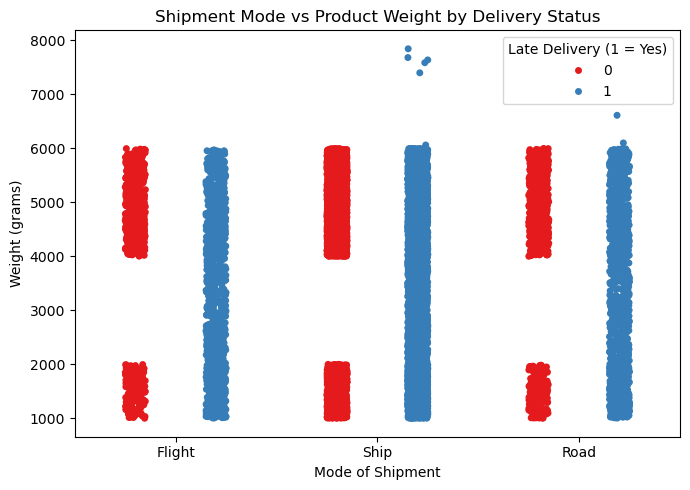

In [14]:
# Plot the relationship between 'Mode_of_Shipment' and 'Weight_in_gms' colored by delivery status
plt.figure(figsize=(7, 5))
sns.stripplot(data=df, x='Mode_of_Shipment', y='Weight_in_gms',
              hue='Reached.on.Time_Y.N', palette='Set1', dodge=True, jitter=True) # Strip plot to visualize the distribution of weights by shipment mode
plt.title("Shipment Mode vs Product Weight by Delivery Status")
plt.xlabel("Mode of Shipment") # X-axis label
plt.ylabel("Weight (grams)")# Y-axis label
plt.legend(title='Late Delivery (1 = Yes)') # Legend title
plt.tight_layout()
plt.show()


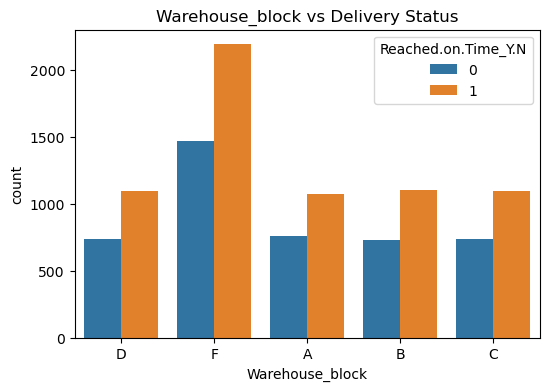

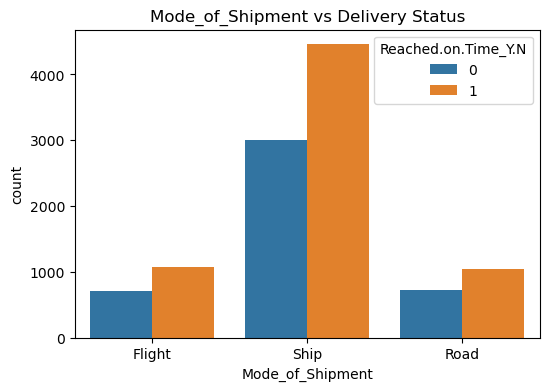

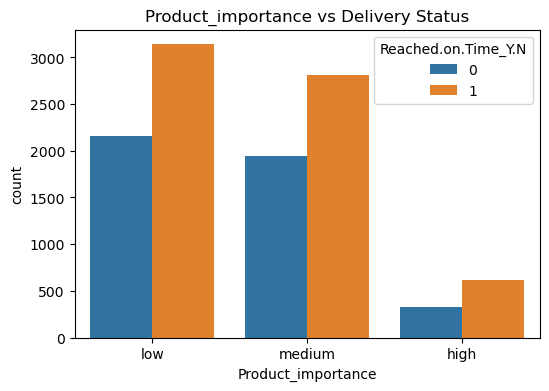

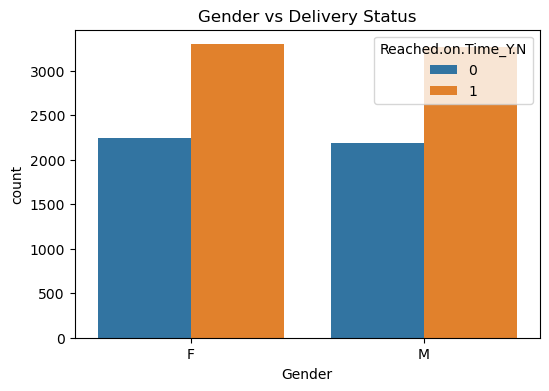

In [15]:
# EDA - Categorical Variable Distributions by Target
categorical_features = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']  # List of categorical features to visualize

for col in categorical_features: # Loop through each categorical feature
    plt.figure(figsize=(6,4)) 
    sns.countplot(x=col, hue='Reached.on.Time_Y.N', data=df) # Count plot to visualize the distribution of each categorical feature by delivery status
    plt.title(f'{col} vs Delivery Status') # Title of the plot
    plt.show()


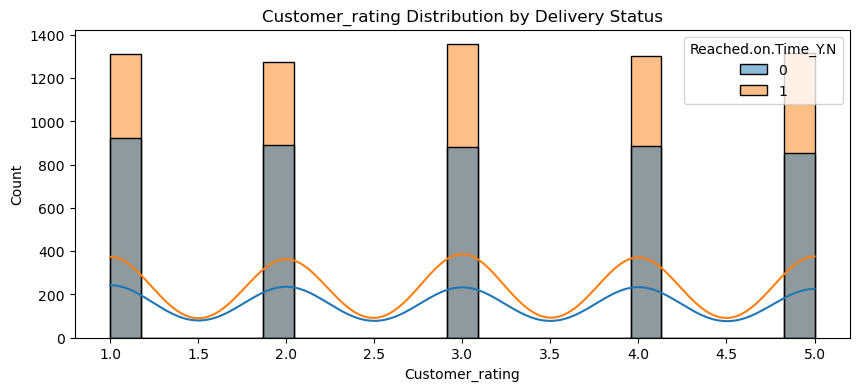

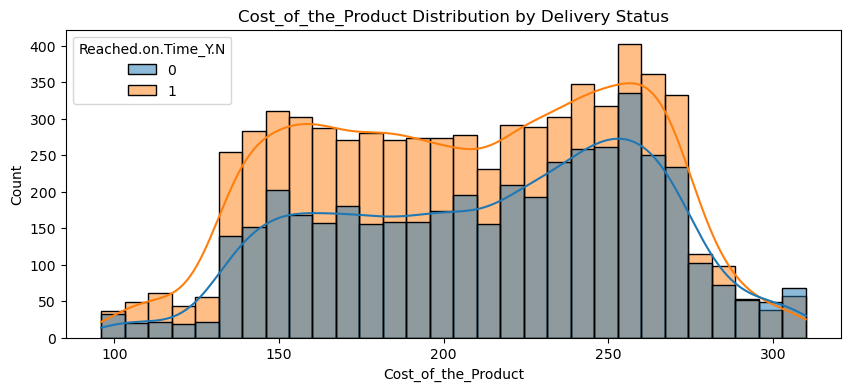

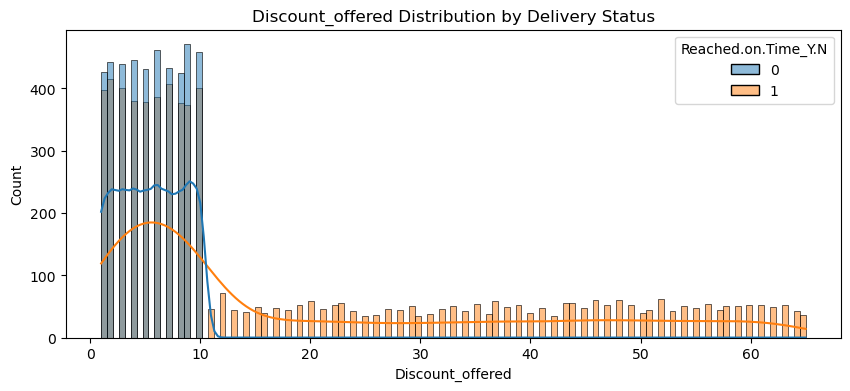

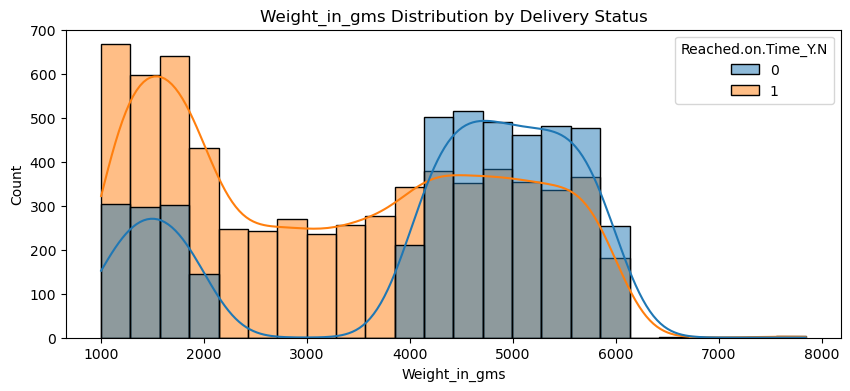

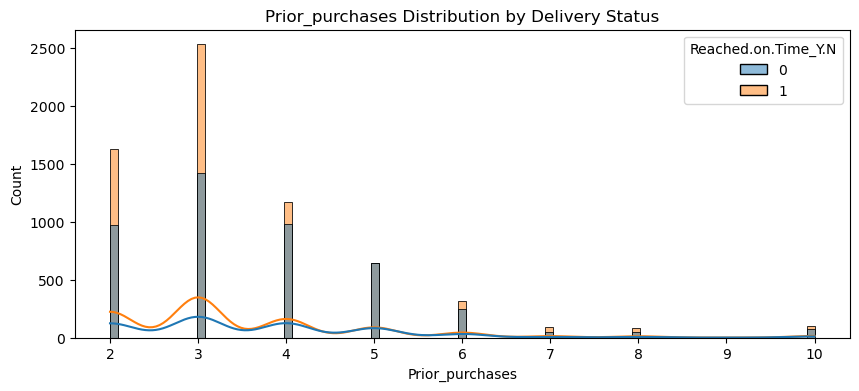

In [16]:
#  Numerical feature distribution by delivery status
numerical_features = ['Customer_rating', 'Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms','Prior_purchases'] # List of numerical features to visualize

# Plot histogram with KDE for each numerical feature
for col in numerical_features: # Loop through each numerical feature
    plt.figure(figsize=(10, 4))
    sns.histplot(data=df, x=col, hue='Reached.on.Time_Y.N', kde=True)  # Histogram with KDE to visualize the distribution of each numerical feature by delivery status
    plt.title(f'{col} Distribution by Delivery Status')  # Title of the plot
    plt.show()


In [17]:
# Remove rows where weight is greater than 6000
df = df[df['Weight_in_gms'] <= 6000]


# Step 4: Feature Engineering

In [18]:
# Create new features based on existing ones
df['discount_ratio'] = df['Discount_offered'] / df['Cost_of_the_Product'] # Calculate discount ratio
df['weight_cost_ratio'] = df['Weight_in_gms'] / df['Cost_of_the_Product'] # Calculate weight to cost ratio


In [19]:
#  Prepare Features and Target
X = df.drop(columns=['ID', 'Reached.on.Time_Y.N'])  # Drop ID and target
y = df['Reached.on.Time_Y.N'] # Target variable


# Step 5: Split the Dataset

In [20]:
# Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Stratified split to maintain class distribution


In [21]:
from sklearn.compose import ColumnTransformer # Column transformations
from sklearn.preprocessing import OneHotEncoder # One-hot encoding for categorical features

# Define columns
categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'] # List of categorical columns
numerical_cols = [
    'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', # Numerical columns
    'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
    'discount_ratio', 'weight_cost_ratio'  # Newly added features
]





# Step 6: Preprocessing Pipeline

In [22]:
# Preprocessing for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())           # StandardScaler to standardize numerical features
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))      # One-hot encoding for categorical features
])

# Combine transformations
preprocessor = ColumnTransformer(                       
    transformers=[                                          
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)  # Combine numerical and categorical transformations
    ])


# Step 7:Model Training and Model Evaluation

In [23]:
# Define the model pipelines for different classifiers
# Logistic Regression Pipeline
from sklearn.model_selection import GridSearchCV   # Grid search for hyperparameter tuning

pipe_lr = Pipeline(steps=[             #pipeline for logistic regression
    ('preprocessor', preprocessor), #preprocessing step
    ('clf', LogisticRegression()) #logistic regression classifier
])                                        

param_grid_lr = {                           
    'clf__C': [0.01, 0.1, 1, 10],
    'clf__solver': ['lbfgs', 'liblinear']# Hyperparameters for logistic regression
}

grid_lr = GridSearchCV(pipe_lr, param_grid=param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)  # Grid search for hyperparameter tuning of logistic regression
grid_lr.fit(X_train[categorical_cols + numerical_cols], y_train)  # Fit the model to the training data


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Customer_care_calls',
                                                                          'Customer_rating',
                                                                          'Cost_of_the_Product',
                                                                          'Prior_purchases',
                                                                          'Discount_offered',
                                                                          'Weight_in_gms',
                                                                          'discount_ratio',
                                                                          'weight_cost_ratio']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['Warehouse_block',
                                                                          'Mode_of_Shipment',
                                                                          'Product_importance',
                                                                          'Gender'])])),
                                       ('clf', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'clf__C': [0.01, 0.1, 1, 10],
                         'clf__solver': ['lbfgs', 'liblinear']},
             scoring='accuracy')

Test Accuracy: 0.647112323783538
Confusion Matrix:
 [[540 348]
 [428 883]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.61      0.58       888
           1       0.72      0.67      0.69      1311

    accuracy                           0.65      2199
   macro avg       0.64      0.64      0.64      2199
weighted avg       0.65      0.65      0.65      2199



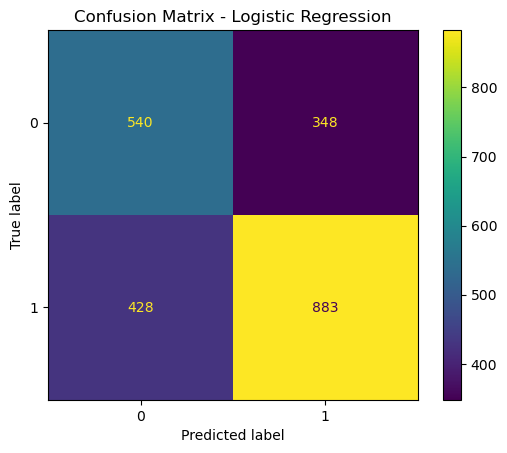

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = grid_lr.predict(X_test[categorical_cols + numerical_cols])  # Make predictions on the test set
print("Test Accuracy:", accuracy_score(y_test, y_pred)) # Print the accuracy of the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))#confusion matrix to evaluate the model's performance
print("Classification Report:\n", classification_report(y_test, y_pred)) #classification report to evaluate precision, recall, and F1-score

# Show confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)# Create confusion matrix display object
disp.plot()
plt.title(f'Confusion Matrix - Logistic Regression')# Title of the confusion matrix plot
plt.show()

In [25]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier

pipe_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', DecisionTreeClassifier(random_state=42)) # Decision Tree classifier with a random state for reproducibility
])

param_grid_dt = {
    'clf__max_depth': [None, 10, 20],

    'clf__min_samples_split': [2, 5,10]
    # Hyperparameters for decision tree classifier
}

grid_dt = GridSearchCV(pipe_dt, param_grid=param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)# Grid search for hyperparameter tuning of decision tree classifier
grid_dt.fit(X_train[categorical_cols + numerical_cols], y_train)# Fit the model to the training data


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Customer_care_calls',
                                                                          'Customer_rating',
                                                                          'Cost_of_the_Product',
                                                                          'Prior_purchases',
                                                                          'Discount_offered',
                                                                          'Weight_in_gms',
                                                                          'discount_ratio',
                                                                          'weight_cost_ratio']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['Warehouse_block',
                                                                          'Mode_of_Shipment',
                                                                          'Product_importance',
                                                                          'Gender'])])),
                                       ('clf',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'clf__max_depth': [None, 10, 20],
                         'clf__min_samples_split': [2, 5, 10]},
             scoring='accuracy')

Test Accuracy: 0.6653024101864484
Confusion Matrix:
 [[771 117]
 [619 692]]
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.87      0.68       888
           1       0.86      0.53      0.65      1311

    accuracy                           0.67      2199
   macro avg       0.71      0.70      0.66      2199
weighted avg       0.73      0.67      0.66      2199



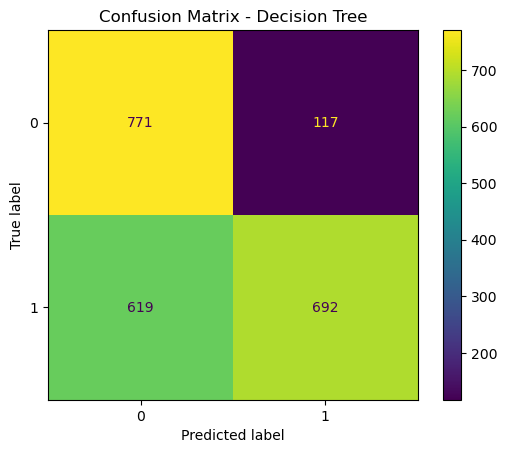

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = grid_dt.predict(X_test[categorical_cols + numerical_cols])# Make predictions on the test set
print("Test Accuracy:", accuracy_score(y_test, y_pred))# Print the accuracy of the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))#confusion matrix to evaluate the model's performance
print("Classification Report:\n", classification_report(y_test, y_pred))#classification report to evaluate precision, recall, and F1-score
# Show confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)# Create confusion matrix display object
disp.plot()
plt.title(f'Confusion Matrix - Decision Tree')
plt.show()

C:\Users\dj005\AppData\Local\Temp\ipykernel_25504\2964245004.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp, y=feat_imp.index, palette='viridis')# Bar plot to visualize feature importances


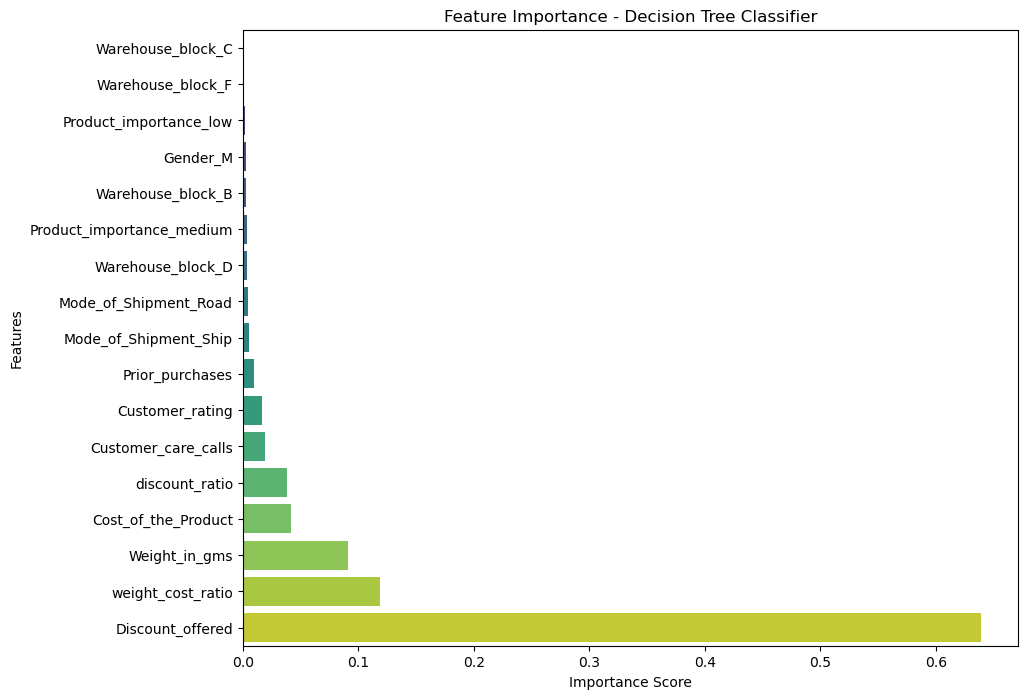

In [ ]:
# Get the best estimator from the grid search
best_dt = grid_dt.best_estimator_

# Get feature importances from the Decision Tree inside the pipeline
importances = best_dt.named_steps['clf'].feature_importances_# Get feature importances from the Decision Tree inside the pipeline

# Get feature names after preprocessing
cat_features = best_dt.named_steps['preprocessor'].transformers_[1][1]['onehot'].get_feature_names_out(categorical_cols)# Get feature names after preprocessing
feature_names = numerical_cols + list(cat_features)# Combine numerical and categorical feature names for plotting

# Plot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=True) # Create a Series of feature importances sorted in ascending order

plt.figure(figsize=(10, 8))
sns.barplot(x=feat_imp, y=feat_imp.index, palette='viridis')# Bar plot to visualize feature importances
plt.title("Feature Importance - Decision Tree Classifier")# Title of the plot
plt.xlabel("Importance Score")# X-axis label
plt.ylabel("Features")# Y-axis label
plt.show()


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier# Import Random Forest Classifier

pipe_rf = Pipeline(steps=[# Pipeline for Random Forest Classifier
    ('preprocessor', preprocessor),# Preprocessing step
    ('clf', RandomForestClassifier(random_state=42))# Random Forest classifier with a random state for reproducibility 
])

param_grid_rf = {
    'clf__n_estimators': [50,100, 200],
    'clf__max_depth': [ None,10, 20],
    'clf__min_samples_split': [2, 5,10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__max_features': ['sqrt', 'log2']# Hyperparameters for random forest classifier
}



grid_rf = GridSearchCV(pipe_rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)# Grid search for hyperparameter tuning of random forest classifier
grid_rf.fit(X_train[categorical_cols + numerical_cols], y_train)# Fit the model to the training data


c:\Users\dj005\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Customer_care_calls',
                                                                          'Customer_rating',
                                                                          'Cost_of_the_Product',
                                                                          'Prior_purchases',
                                                                          'Discount_offered',
                                                                          'Weight_in_gms',
                                                                          'discount_ratio',
                                                                          'weight_cost_ratio']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(dro...
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['Warehouse_block',
                                                                          'Mode_of_Shipment',
                                                                          'Product_importance',
                                                                          'Gender'])])),
                                       ('clf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'clf__max_depth': [None, 10, 20],
                         'clf__max_features': ['sqrt', 'log2'],
                         'clf__min_samples_leaf': [1, 2, 4],
                         'clf__min_samples_split': [2, 5, 10],
                         'clf__n_estimators': [50, 100, 200]},
             scoring='accuracy')

Test Accuracy: 0.6748522055479763
Confusion Matrix:
 [[807  81]
 [634 677]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.91      0.69       888
           1       0.89      0.52      0.65      1311

    accuracy                           0.67      2199
   macro avg       0.73      0.71      0.67      2199
weighted avg       0.76      0.67      0.67      2199



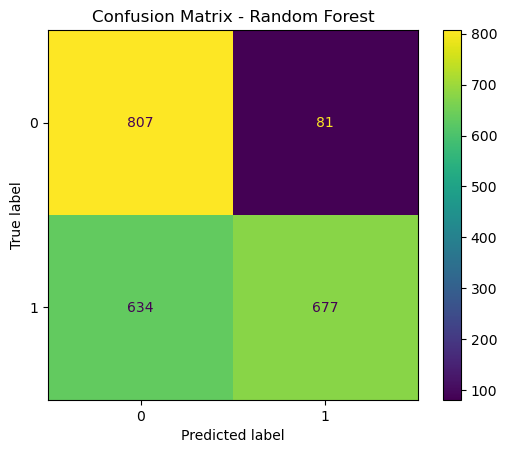

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report# Model evaluation metrics

y_pred = grid_rf.predict(X_test[categorical_cols + numerical_cols])# Make predictions on the test set
print("Test Accuracy:", accuracy_score(y_test, y_pred))# Print the accuracy of the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))#confusion matrix to evaluate the model's performance
print("Classification Report:\n", classification_report(y_test, y_pred))#classification report to evaluate precision, recall, and F1-score
# Show confusion matrix
cm = confusion_matrix(y_test, y_pred)# Create confusion matrix display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)# Create confusion matrix display object
disp.plot()
plt.title(f'Confusion Matrix - Random Forest')# Title of the confusion matrix plot
plt.show()

C:\Users\dj005\AppData\Local\Temp\ipykernel_25504\2557438446.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp, y=feat_imp.index, palette='viridis')# Bar plot to visualize feature importances


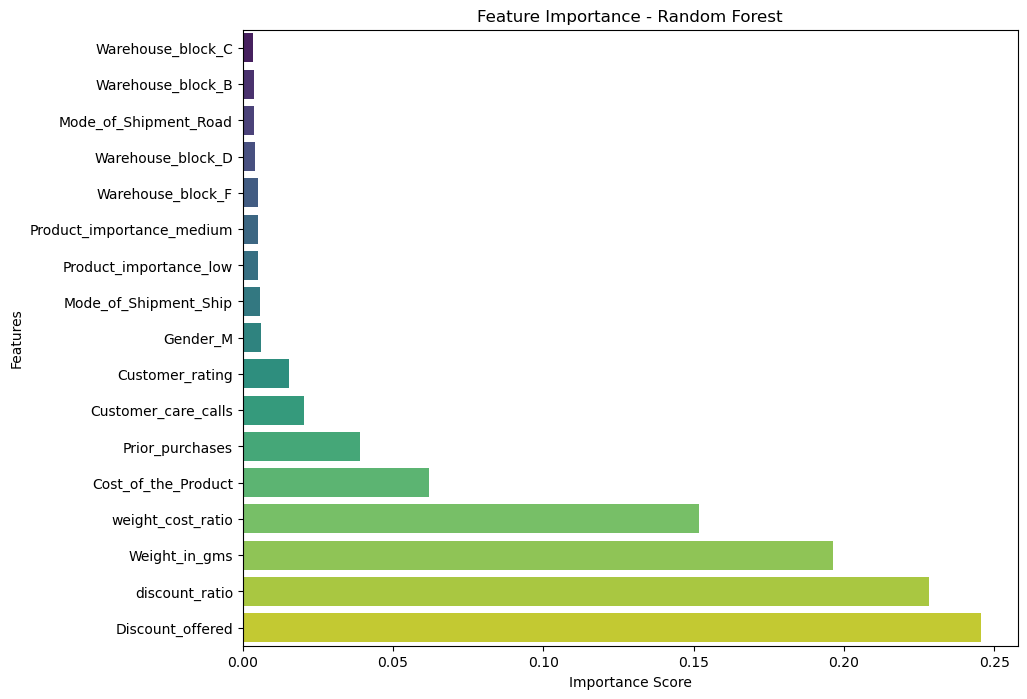

In [30]:
# Assume `grid_rf` is your trained GridSearchCV object
best_rf = grid_rf.best_estimator_# Get the best estimator from the grid search

# Get feature importances from the RandomForest inside the pipeline
importances = best_rf.named_steps['clf'].feature_importances_# Get feature importances from the Random Forest inside the pipeline

# Get feature names after preprocessing
cat_features = best_rf.named_steps['preprocessor'].transformers_[1][1]['onehot'].get_feature_names_out(categorical_cols)# Get feature names after preprocessing
feature_names = numerical_cols + list(cat_features)# Combine numerical and categorical feature names for plotting

# Plot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=True)# Create a Series of feature importances sorted in ascending order

plt.figure(figsize=(10, 8))
sns.barplot(x=feat_imp, y=feat_imp.index, palette='viridis')# Bar plot to visualize feature importances
plt.title("Feature Importance - Random Forest")# Title of the plot
plt.xlabel("Importance Score")# X-axis label
plt.ylabel("Features")# Y-axis label
plt.show()


In [31]:
from sklearn.neighbors import KNeighborsClassifier# K-Nearest Neighbors Classifier

pipe_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', KNeighborsClassifier())# Pipeline for K-Nearest Neighbors Classifier
])# Pipeline for K-Nearest Neighbors Classifier

param_grid_knn = {
    'clf__n_neighbors': [3, 5, 7],
    'clf__weights': ['uniform', 'distance'],
    'clf__metric': ['minkowski', 'euclidean']# Hyperparameters for K-Nearest Neighbors Classifier
}

grid_knn = GridSearchCV(pipe_knn, param_grid=param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)# Grid search for hyperparameter tuning of K-Nearest Neighbors Classifier
grid_knn.fit(X_train[categorical_cols + numerical_cols], y_train)# Fit the model to the training data


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Customer_care_calls',
                                                                          'Customer_rating',
                                                                          'Cost_of_the_Product',
                                                                          'Prior_purchases',
                                                                          'Discount_offered',
                                                                          'Weight_in_gms',
                                                                          'discount_ratio',
                                                                          'weight_cost_ratio']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['Warehouse_block',
                                                                          'Mode_of_Shipment',
                                                                          'Product_importance',
                                                                          'Gender'])])),
                                       ('clf', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'clf__metric': ['minkowski', 'euclidean'],
                         'clf__n_neighbors': [3, 5, 7],
                         'clf__weights': ['uniform', 'distance']},
             scoring='accuracy')

Test Accuracy: 0.6502955889040473
Confusion Matrix:
 [[582 306]
 [463 848]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.66      0.60       888
           1       0.73      0.65      0.69      1311

    accuracy                           0.65      2199
   macro avg       0.65      0.65      0.65      2199
weighted avg       0.66      0.65      0.65      2199



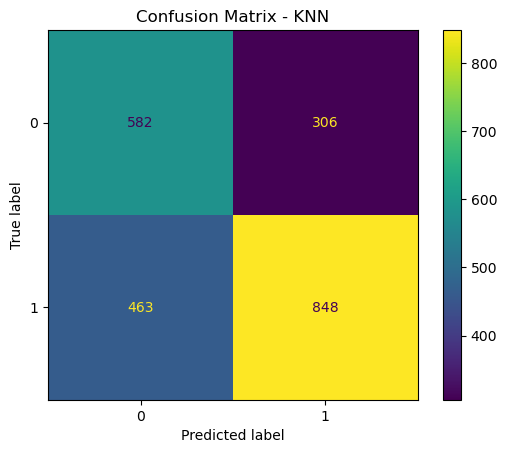

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report# Model evaluation metrics

y_pred = grid_knn.predict(X_test[categorical_cols + numerical_cols])# Make predictions on the test set
print("Test Accuracy:", accuracy_score(y_test, y_pred))# Print the accuracy of the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))#confusion matrix to evaluate the model's performance
print("Classification Report:\n", classification_report(y_test, y_pred))#classification report to evaluate precision, recall, and F1-score
# Show confusion matrix
cm = confusion_matrix(y_test, y_pred)# Create confusion matrix display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)# Create confusion matrix display object
disp.plot()
plt.title(f'Confusion Matrix - KNN')# Title of the confusion matrix plot
plt.show()

# Step 8: Visualization of Results

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix# classification_report

# Store results in a dictionary
results = {}# Dictionary to store model results

# List of model names and their GridSearchCV objects
models = {
    'Logistic Regression': grid_lr,# Logistic Regression model
    'Decision Tree': grid_dt,# Decision Tree model
    'Random Forest': grid_rf,#  Random Forest model
    'KNN': grid_knn# Pipeline for K-Nearest Neighbors Classifier
}# Dictionary of models to evaluate

for name, model in models.items():# Loop through each model
    best_model = model.best_estimator_# Get the best estimator from the grid search
    y_pred = best_model.predict(X_test[categorical_cols + numerical_cols])# Make predictions on the test set
    acc = accuracy_score(y_test, y_pred)# Calculate accuracy of the predictions
    results[name] = {
        'model': best_model,# Best model after hyperparameter tuning
        'y_pred': y_pred,# Predictions made by the model
        'accuracy': acc,# Accuracy of the model
        'conf_matrix': confusion_matrix(y_test, y_pred)# Confusion matrix for the model
    }


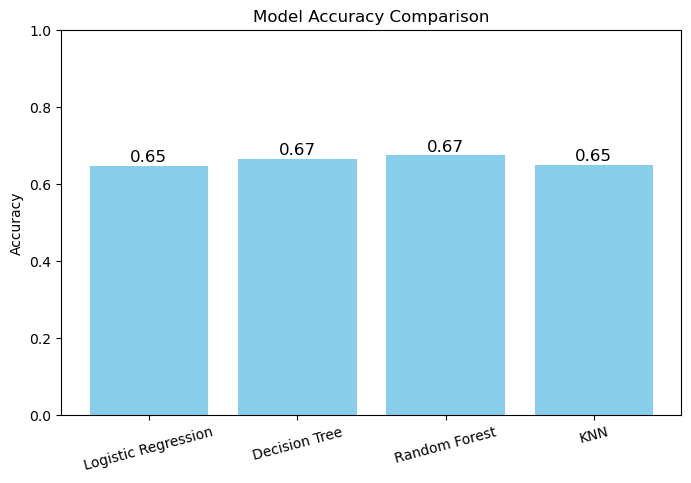

In [ ]:
import matplotlib.pyplot as plt# # Data visualization

# Extract accuracies
model_names = list(results.keys())# List of model names
accuracies = [results[name]['accuracy'] for name in model_names]# Extract accuracies from results dictionary

# Bar Plot
plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color='skyblue')# Bar plot to visualize model accuracies
plt.ylabel('Accuracy')# Y-axis label
plt.title('Model Accuracy Comparison')# Title of the plot
plt.ylim(0, 1)# Set y-axis limits to [0, 1] for accuracy
for i, acc in enumerate(accuracies):   # Loop through each accuracy value
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=12)# Display accuracy values on top of bars
plt.xticks(rotation=15)# Rotate x-axis labels for better readability
plt.show() # Show the plot


### The Random Forest model was chosen as the best-performing classifier with a test accuracy of 67.5%. It showed the strongest ability to detect late deliveries (Recall = 0.91) and maintained high precision for on-time predictions (0.89), making it the most reliable choice for minimizing delivery delays and improving customer satisfaction.

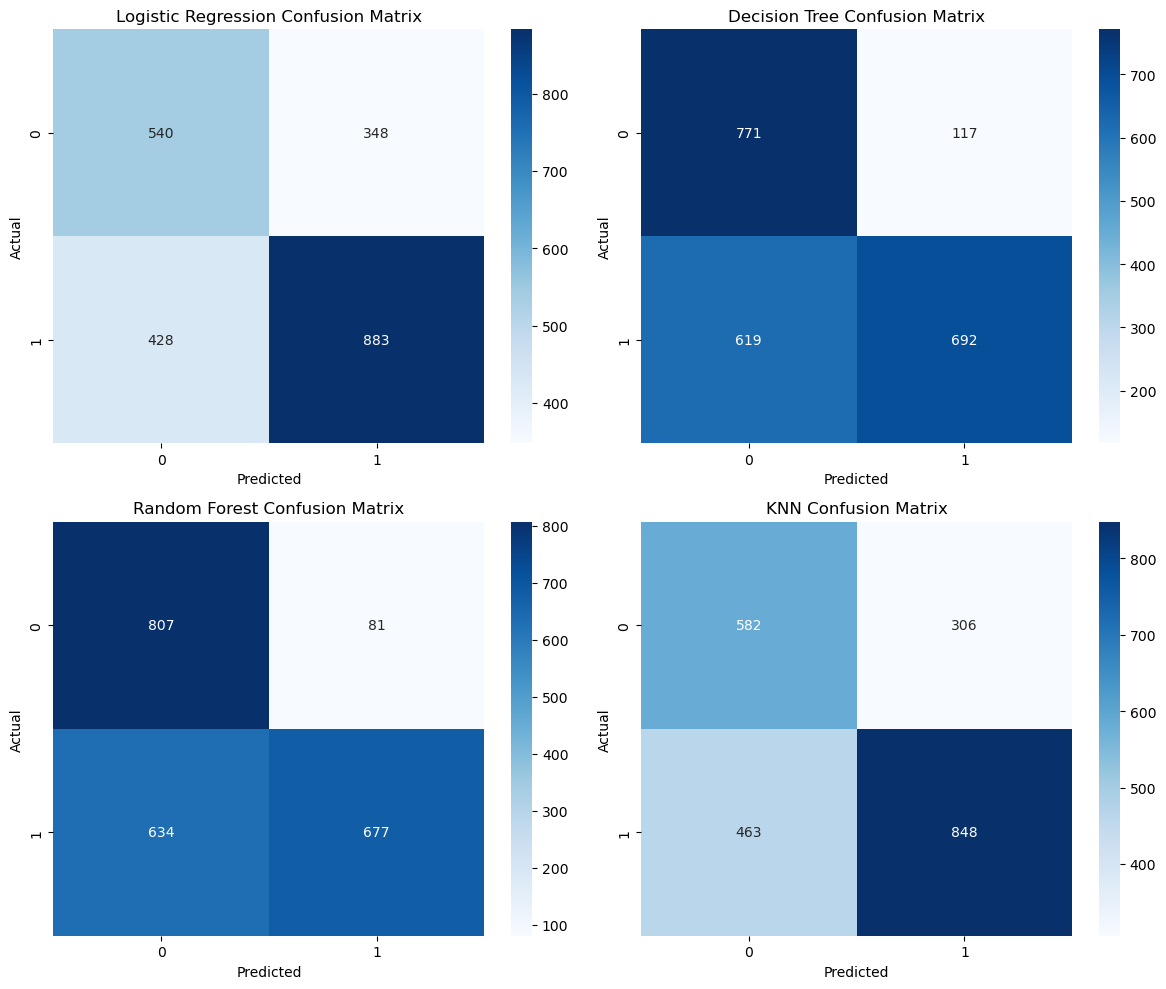

In [ ]:
import seaborn as sns # Data visualization library
# Plot confusion matrices for each model
fig, axes = plt.subplots(2, 2, figsize=(12, 10))# Create a 2x2 grid of subplots for confusion matrices
axes = axes.flatten()# Flatten the axes array for easy indexing

for i, name in enumerate(model_names):# Loop through each model
    cm = results[name]['conf_matrix']# Get the confusion matrix for the model
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])# Heatmap to visualize the confusion matrix
    axes[i].set_title(f'{name} Confusion Matrix')# Title of the confusion matrix plot
    axes[i].set_xlabel('Predicted')# X-axis label
    axes[i].set_ylabel('Actual')# Y-axis label

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()# Show the confusion matrices plot


C:\Users\dj005\AppData\Local\Temp\ipykernel_25504\3226953996.py:38: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()# Adjust layout to prevent overlap
c:\Users\dj005\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


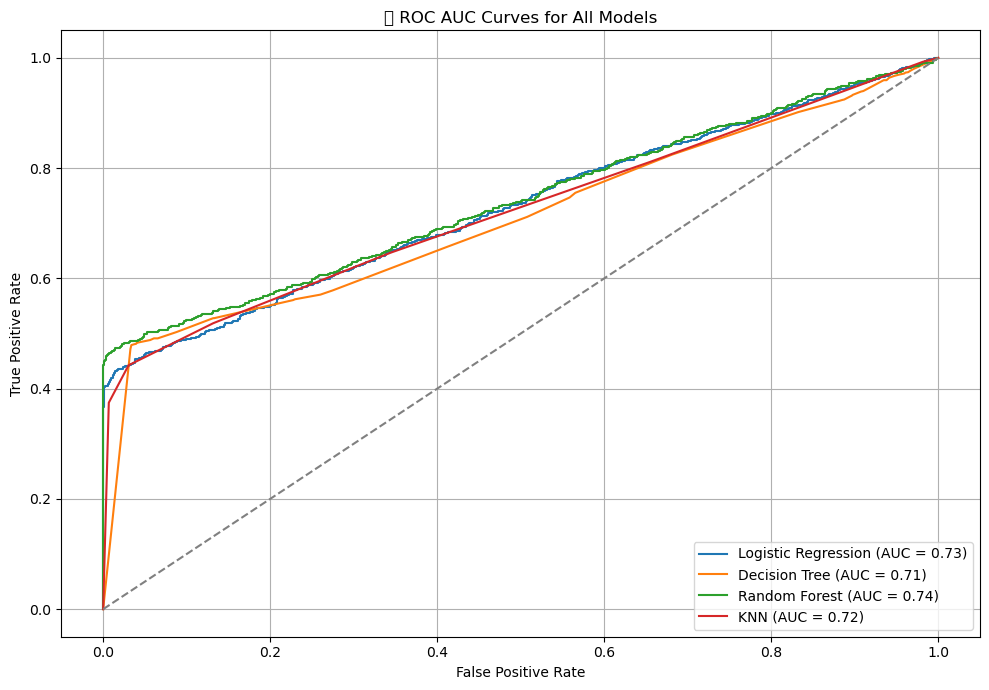

In [ ]:
# Plot ROC AUC Curves for All Models
from sklearn.metrics import roc_curve, roc_auc_score # Import necessary metrics for ROC AUC curves
import matplotlib.pyplot as plt# # Data visualization

# Create a dictionary of models
models = {                              # Dictionary of models to evaluate
    'Logistic Regression': grid_lr,
    'Decision Tree': grid_dt,
    'Random Forest': grid_rf,
    'KNN': grid_knn
}

plt.figure(figsize=(10, 7))# Create a figure for the ROC AUC curves

# Loop through each model
for name, model in models.items():# Loop through each model
    # Get predicted probabilities for the positive class (class 1 = not on time)
    y_proba = model.predict_proba(X_test[categorical_cols + numerical_cols])[:, 1]# Get predicted probabilities for the positive class (class 1 = not on time)

    # Calculate FPR, TPR
    fpr, tpr, _ = roc_curve(y_test, y_proba)# Calculate false positive rate (FPR) and true positive rate (TPR)

    # Compute AUC
    auc = roc_auc_score(y_test, y_proba)# Compute the Area Under the Curve (AUC) for the ROC curve

    # Plot curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')# Plot the ROC curve for the model with AUC value in the label

# Plot baseline (random guess)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')# Baseline line for random guessing (AUC = 0.5)

# Plot settings
plt.title("📈 ROC AUC Curves for All Models") 
plt.xlabel("False Positive Rate")# X-axis label
plt.ylabel("True Positive Rate")# Y-axis label
plt.legend(loc="lower right")# Legend for the plot
plt.grid(True)# Enable grid for better readability
plt.tight_layout()# Adjust layout to prevent overlap
plt.show()# Show the ROC AUC curves plot


# Step 9: Model Selection

In [37]:
import joblib# Save the best model to a file

# Save the full best pipeline (preprocessor + best model)
joblib.dump(grid_rf.best_estimator_, 'best_random_forest_model.joblib')# Save the best Random Forest model to a file

print("✅ Model saved successfully as 'best_random_forest_model.joblib'")# Print confirmation message


✅ Model saved successfully as 'best_random_forest_model.joblib'


### Conclusion
### After evaluating multiple models—Logistic Regression, Decision Tree, K-Nearest Neighbors, and Random Forest—the Random Forest Classifier was selected as the best model for predicting e-commerce product delivery timeliness. It achieved the highest test accuracy (67.5%), with exceptional recall for late deliveries (0.91) and strong precision for on-time deliveries (0.89). This makes it highly suitable for real-world deployment, where correctly identifying delayed shipments is critical for improving logistics and customer satisfaction.

